Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data.

Overview

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

Dataset: "Alphabets_data.csv" 

The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.

1. Data Exploration and Preprocessing
   
●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.

●	Execute necessary data preprocessing steps including data normalization, managing missing values.

In [2]:
import sys
!{sys.executable} -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 3.7/332.0 MB 21.1 MB/s eta 0:00:16
    --------------------------------------- 6.6/332.0 MB 16.4 MB/s eta 0:00:20
   - -------------------------------------- 9.2/332.0 MB 15.3 MB/s eta 0:00:22
   - -------------------------------------- 11.8/332.0 MB 14.7 MB/s eta 0:00:22
   - -------------------------------------- 14.7/332.0 MB 14.4 MB/s eta 0:00:23
   -- ------------------------------------- 17.3/332.0 MB 14.1 MB/s eta 0:00:23
   -- ------------------------------------- 20.2/332.0 MB 13.9 MB/s eta 0:00:23
   -- ------------------------------------- 22.8/332.0 MB 13.8 MB/s eta 0:00:23
   --- ------------------------------------ 25.4/332.0 MB 13.7 MB/s eta 0:00:23
   --- ------------------------------------ 28.0/332.0 MB 13.6 MB/s eta 0:00:23
   --- ------------------------------------ 30.7/332.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import sys
!{sys.executable} -m pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [kt-legacy]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   ---------------------------------------- 2/2 [keras-tuner]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense
# Dense :- to add layers (hidden.output)
from tensorflow.keras import Sequential
# sequential:- to add layers in sequence , to initialize ANN model i.e initially random weight will be assigned
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras import layers, models
from keras_tuner import HyperModel
import warnings
warnings.filterwarnings('ignore')

C:\Users\laksh\AppData\Local\Temp\ipykernel_4340\1964761846.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [5]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
df.info()        # no missing values as each and every column contains total 18668 non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
df.isna().sum()   #no missing values found

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
df.dtypes    #all columns datatypes are correct

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [10]:
df.describe().shape

(8, 16)

In [11]:
df.describe(include=object)    #target column

,letter
count,20000
unique,26
top,U
freq,813


In [12]:
df.duplicated().sum()   # total number of duplicates

np.int64(1332)

In [13]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [14]:
df[df.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()  # all duplicates are deleted

np.int64(0)

In [17]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [18]:
df['letter'].value_counts()

letter
P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: count, dtype: int64

In [19]:
df['letter'].unique().shape   # total 26 alphabets

(26,)

In [20]:
lb = LabelEncoder()
df['letter'] = lb.fit_transform(df['letter'])

In [21]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [22]:
df['letter'].value_counts()

letter
15    782
20    768
3     760
16    760
0     756
5     752
19    748
24    746
6     743
17    737
12    732
1     730
18    729
22    726
4     725
14    718
10    718
9     715
2     710
21    706
7     704
13    688
23    678
11    673
25    640
8     524
Name: count, dtype: int64

In [23]:
df['letter'].unique().shape

(26,)

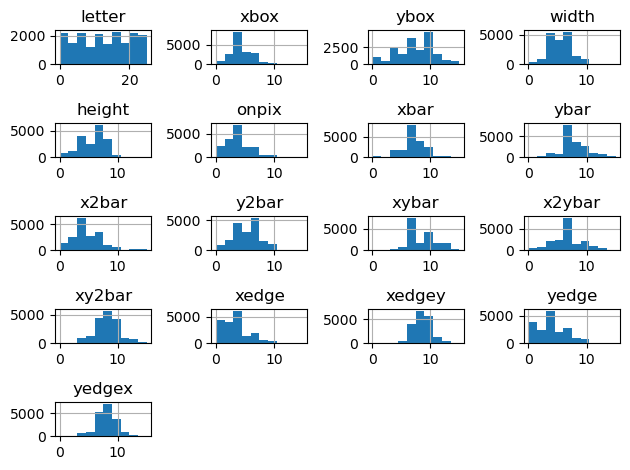

In [24]:
df.hist()
plt.tight_layout()
plt.show()

<Axes: >

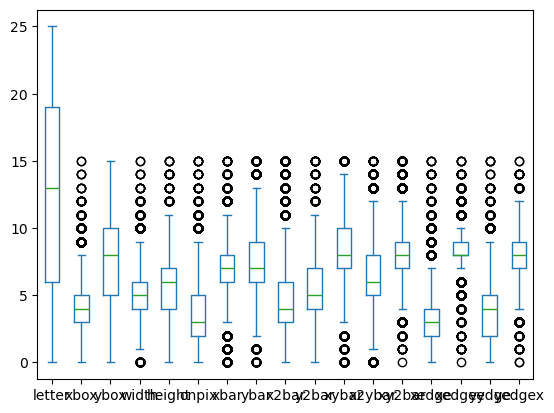

In [25]:
df.plot(kind='box')      # outliers are present 

2. Model Implementation
   
●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer

●	Divide the dataset into training and test sets.

●	Train your model on the training set and then use it to make predictions on the test set.

In [26]:
x = df.drop(columns=['letter'])

In [27]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [28]:
y = df['letter']

In [29]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [31]:
xtrain

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
8802,4,7,5,5,4,5,7,6,7,6,6,13,3,8,5,10
13659,4,6,7,8,2,8,6,3,1,7,0,8,3,7,2,8
11530,4,9,4,4,2,5,11,2,6,11,8,5,2,8,3,5
8596,5,8,7,6,5,9,8,6,4,7,5,8,3,8,10,7
17062,5,10,6,8,8,8,8,5,3,8,5,7,5,9,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,3,4,4,3,1,6,11,2,8,11,9,5,1,10,2,5
18451,2,3,3,2,2,7,8,5,5,6,5,7,2,6,5,8
5346,7,14,7,8,4,6,5,4,5,12,9,11,3,9,7,8
12826,1,3,1,2,0,7,7,2,6,7,6,8,0,8,2,8


In [32]:
xtest

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
12583,4,10,6,7,4,4,12,4,4,13,8,5,2,10,2,6
10465,8,11,6,6,3,8,5,4,6,8,3,8,5,7,5,8
13430,7,8,10,7,11,8,8,4,3,6,6,7,12,7,6,7
10253,2,6,3,4,1,7,7,3,13,9,6,8,0,8,7,8
15042,4,6,5,4,6,8,6,4,2,8,7,9,7,9,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11528,4,9,5,7,6,5,7,4,5,7,6,9,6,10,5,7
8083,4,10,5,8,5,7,7,6,9,7,6,10,3,8,6,8
4771,1,1,2,1,0,8,7,4,7,5,6,7,0,8,7,8
7718,7,13,7,7,4,9,5,4,6,10,3,7,5,6,5,11


In [33]:
ytrain

8802     10
13659     0
11530    19
8596     25
17062    18
         ..
11506    19
18451    17
5346     11
12826     8
235       5
Name: letter, Length: 14934, dtype: int64

In [34]:
ytest

12583     5
10465    14
13430    12
10253    25
15042    21
         ..
11528     2
8083      4
4771     18
7718      3
7966     14
Name: letter, Length: 3734, dtype: int64

In [35]:
xtrain.shape

(14934, 16)

In [36]:
ytrain.shape

(14934,)

In [37]:
xtest.shape

(3734, 16)

In [38]:
ytest.shape

(3734,)

In [39]:
#create instance of sequential class
model = Sequential()

In [40]:
#create neurons in input , hideen and output layers ans assign random weights to input
# an input layer 16 neurons will be there as , there are 16 independent features
# add hidden layer , randomly 10 neurons are added

In [41]:
model.add(Dense(64,input_dim=16,activation='relu')) # input layer + hidden layer
model.add(Dense(32,activation='relu')) # another hidden layer
model.add(Dense(len(df.letter),activation='softmax'))

In [42]:
# Layers are added sequentially using the .add() method.
# Each layer receives input from the previous layer and passes output to the next one.

In [43]:
model

<Sequential name=sequential, built=True>

In [44]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
# train the  model
history = model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2932 - loss: 2.7278 - val_accuracy: 0.5239 - val_loss: 1.6659
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5896 - loss: 1.4409 - val_accuracy: 0.6515 - val_loss: 1.2877
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6674 - loss: 1.1878 - val_accuracy: 0.6438 - val_loss: 1.2088
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7007 - loss: 1.0646 - val_accuracy: 0.6987 - val_loss: 1.0879
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7175 - loss: 0.9924 - val_accuracy: 0.7328 - val_loss: 1.0076
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7311 - loss: 0.9406 - val_accuracy: 0.7104 - val_loss: 1.0371
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7486 - loss: 0.8815 - val_accuracy: 0.7298 - val_loss: 0.9422
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7542 - loss: 0.8460 - val_accuracy: 0.

In [46]:
# epochs=10 means that the model will go through the entire xtrain and ytrain dataset 10 times during training.
# epoch: backward and forward propagation will be done for 10 times
# The number of batches per epoch = Total number of samples / Batch size (default is 32)
# Each batch is processed in sequence during each epoch,


In [47]:
test_loss , test_acc = model.evaluate(xtest,ytest)
print('test accuracy:', test_acc)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7662 - loss: 0.7813 
test accuracy: 0.766202449798584


In [48]:
# accuracy is not good and error is also high as hyperparameter tuning is not done

In [49]:
ypred = model.predict(xtest)
ypred # in dataset target column values are 0 or 1, but here output is a continuous number
# because in output layer activation function is sigmoid. It gives you o/p in terms of probability
# In sigmoid if probability is > 0.5 it gives you 1 and if probability < 0 it should give 0

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.8115861e-09, 1.8709022e-07, 1.9311631e-06, ..., 1.3785407e-15,
        8.7441726e-16, 2.8550426e-16],
       [1.0386866e-02, 6.2669418e-03, 8.8418685e-02, ..., 7.0526263e-10,
        8.2697516e-10, 1.3689420e-09],
       [5.7828845e-07, 1.7344353e-09, 3.6019108e-07, ..., 1.5365054e-15,
        1.2734532e-15, 1.6493544e-15],
       ...,
       [1.2251761e-05, 8.9129683e-04, 8.0326608e-05, ..., 4.0154486e-12,
        5.1682846e-12, 3.9627143e-12],
       [1.2310728e-04, 8.1408806e-02, 4.5351828e-03, ..., 2.0648611e-11,
        2.8078760e-11, 4.8150321e-11],
       [2.0675673e-04, 3.1175239e-06, 2.1797135e-03, ..., 1.2906388e-12,
        1.6196358e-12, 1.1379598e-12]], dtype=float32)

In [50]:
ytest

12583     5
10465    14
13430    12
10253    25
15042    21
         ..
11528     2
8083      4
4771     18
7718      3
7966     14
Name: letter, Length: 3734, dtype: int64

In [51]:
#print(classification_report(ytest,ypred))

In [52]:
ypred > 0.5 # not it will give me 1 or 0 OR true or false answers

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
ypred = ypred > 0.5
ypred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [54]:
#print(classification_report(ytest,ypred))

3. Hyperparameter Tuning
   
●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [55]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()    #create instance of sequential class
    model.add(Dense(hp.Int('units', min_value=32, max_value=128, step=32), input_dim=16,activation='relu'))   #Add hidden layer
    model.add(Dense(hp.Int('units', min_value=32, max_value=128, step=32),activation='relu' ))
    model.add(Dense(len(df.letter), activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),loss='sparse_categorical_crossentropy',metrics=['accuracy'])#Optimizer selection
    return model

In [56]:
# similar to GridSearchCV() we will use here RandomSearch()
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

In [57]:
tuner.search(xtrain, ytrain, epochs=10, validation_split=0.2)
# tuner.search() is equivalent to grid.fit()
# epochs should be same as max_trials so 3 is selected
# validation_data: pass test data

Trial 5 Complete [00h 01m 20s]
val_accuracy: 0.8423166871070862

Best val_accuracy So Far: 0.8423166871070862
Total elapsed time: 00h 04m 48s


In [58]:
best_model = tuner.get_best_models(num_models=1)[0]

In [59]:
best_model

<Sequential name=sequential, built=True>

In [60]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
# as per performance all optimizers are stored in an array
# we want high accuracy optimizer present at index 0 location


In [61]:
best_hyperparameters

In [62]:
best_model = tuner.hypermodel.build(best_hyperparameters)

In [63]:
best_model

<Sequential name=sequential_1, built=True>

In [64]:
test_loss, test_acc = best_model.evaluate(xtest, ytest) # same as score() function
print("Test accuracy of the tuned model:", test_acc)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 9.8462   
Test accuracy of the tuned model: 0.0


4. Evaluation
   
●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# Make predictions
y_pred = model.predict(xtest)
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = ytest.argmax(axis=-1)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [67]:
y_test_pred = model.predict(xtest)
y_test_pred = y_test_pred.argmax(axis=1)  # Convert probabilities to class labels

accuracy = accuracy_score(ytest, y_test_pred)
report = classification_report(ytest, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7662024638457419
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       153
           1       0.68      0.76      0.72       138
           2       0.70      0.72      0.71       133
           3       0.79      0.83      0.81       155
           4       0.66      0.69      0.67       131
           5       0.82      0.67      0.74       153
           6       0.68      0.67      0.68       131
           7       0.84      0.47      0.60       131
           8       0.83      0.72      0.77       106
           9       0.93      0.86      0.89       159
          10       0.62      0.71      0.66       129
          11       0.78      0.83      0.80       132
          12       0.90      0.87      0.88       151
          13       0.86      0.83      0.85       156
          14       0.69      0.77      0.73       154
          15       0.82      0.86      0.